In [1]:
import pandas as pd

df = pd.read_csv('/content/CVD_data.csv')
df

,No,Age,Gender,Height,Weight,SBP,DBP,Cholesterol,Glucose,Smoking,Alchol Intake,Physical Activity,Presence/Absence of CVD
0,64,60,1,175,59,140,100,2,1,1,0,1,0
1,1302,56,2,152,55,120,90,1,2,0,0,1,0
2,945,68,2,152,55,120,90,1,2,0,0,1,0
3,1079,49,1,182,81,155,115,3,2,1,0,1,1
4,129,46,2,183,61,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775,1131,56,2,156,54,140,110,3,2,0,0,1,1
1776,1295,42,2,142,41,110,60,1,3,0,0,1,1
1777,861,61,1,165,65,100,60,1,1,0,0,0,0
1778,1460,45,2,157,56,130,100,1,3,0,0,0,0


## EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780 entries, 0 to 1779
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   No                       1780 non-null   int64 
 1   Age                      1780 non-null   int64 
 2   Gender                   1780 non-null   object
 3   Height                   1780 non-null   int64 
 4   Weight                   1780 non-null   int64 
 5   SBP                      1780 non-null   int64 
 6   DBP                      1780 non-null   int64 
 7   Cholesterol              1780 non-null   int64 
 8   Glucose                  1780 non-null   int64 
 9   Smoking                  1780 non-null   int64 
 10  Alchol Intake            1780 non-null   int64 
 11  Physical Activity        1780 non-null   int64 
 12  Presence/Absence of CVD  1780 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 180.9+ KB


In [3]:
df['Presence/Absence of CVD'].value_counts()

,count
Presence/Absence of CVD,
0,1168
1,612


In [4]:
df['Gender'].value_counts()

,count
Gender,
1,904
2,874
M,1
F,1


In [5]:
df['Gender'] = df['Gender'].replace({'M': 1, 'F': 2})

df['Gender'].value_counts()

,count
Gender,
1,904
2,874
1,1
2,1


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

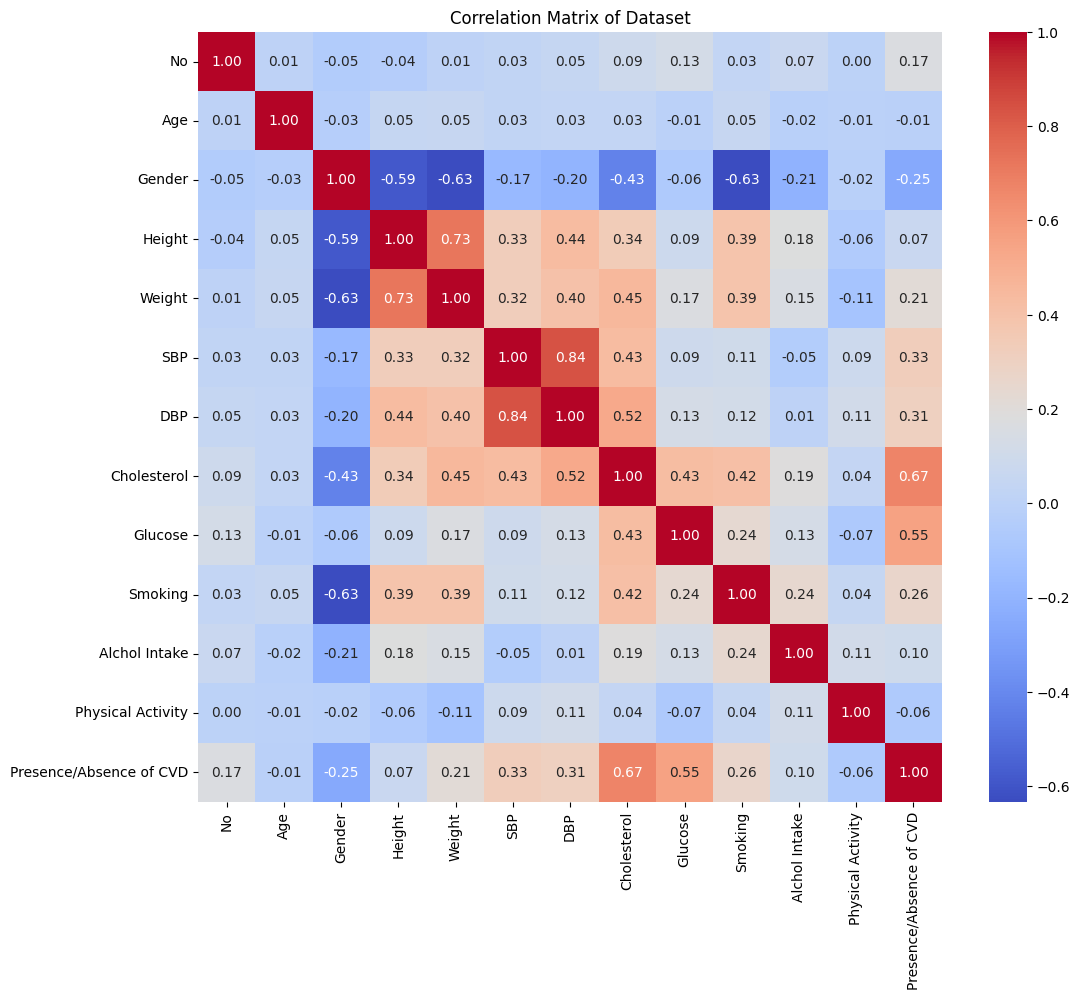

In [7]:
correlation_matrix = df.corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Dataset')
plt.show()

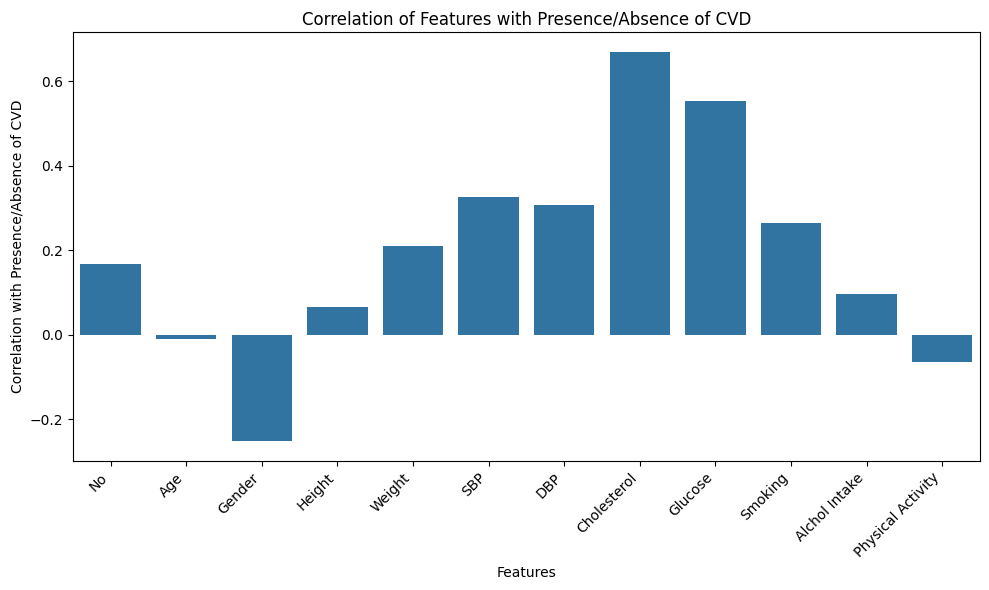

In [8]:
correlations = df.corr()['Presence/Absence of CVD'].drop('Presence/Absence of CVD')

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Correlation with Presence/Absence of CVD')
plt.title('Correlation of Features with Presence/Absence of CVD')
plt.tight_layout()
plt.show()

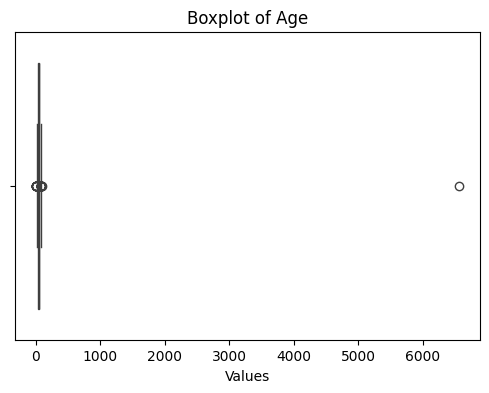

In [9]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.xlabel('Values')

plt.show()

In [10]:
top_5_ages = df['Age'].nlargest(5)

top_5_ages

,Age
85,6556
1476,96
833,92
970,91
1391,91


In [11]:
df = df[df['Age']<=120]

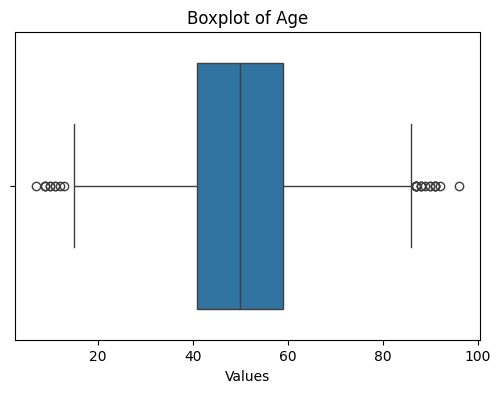

In [12]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.xlabel('Values')

plt.show()

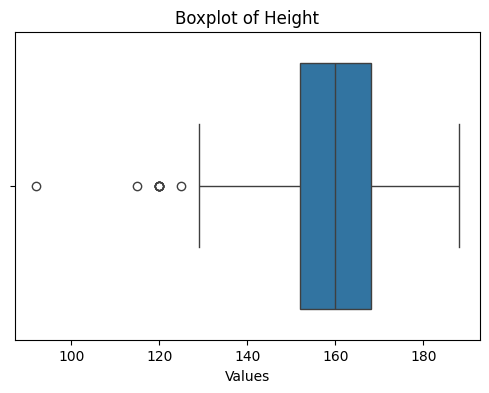

In [13]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Height'])
plt.title('Boxplot of Height')
plt.xlabel('Values')

plt.show()

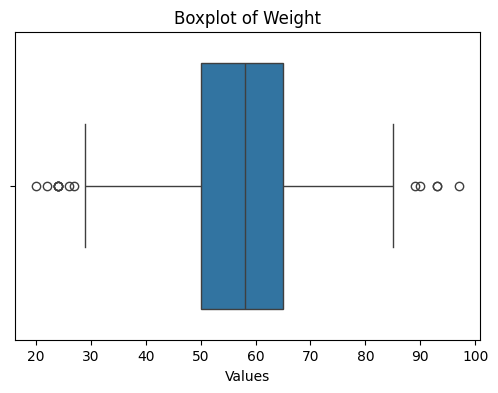

In [14]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Weight'])
plt.title('Boxplot of Weight')
plt.xlabel('Values')

plt.show()

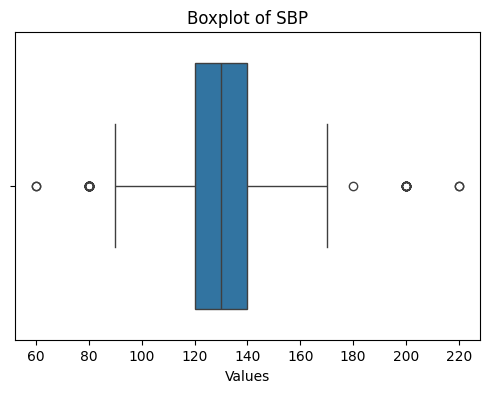

In [15]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['SBP'])
plt.title('Boxplot of SBP')
plt.xlabel('Values')

plt.show()

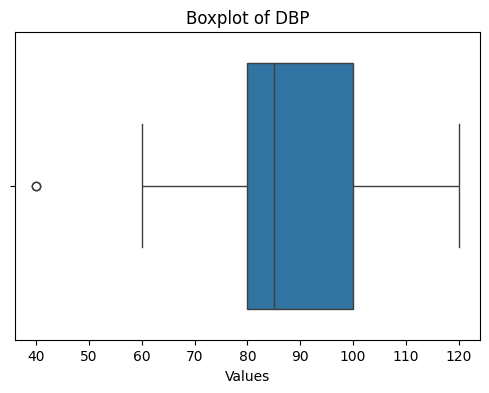

In [16]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['DBP'])
plt.title('Boxplot of DBP')
plt.xlabel('Values')

plt.show()

In [17]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
1,1102
2,457
3,220


In [18]:
df['Glucose'].value_counts()

,count
Glucose,
1,906
2,567
3,306


In [19]:
df['Smoking'].value_counts()

,count
Smoking,
0,1258
1,521


In [20]:
df['Alchol Intake'].value_counts()

,count
Alchol Intake,
0,1700
1,79


In [21]:
df['Physical Activity'].value_counts()

,count
Physical Activity,
1,1371
0,408


## Model Train

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
X = df.drop('Presence/Absence of CVD', axis=1)
y = df['Presence/Absence of CVD']

In [24]:
# prompt: code for oversampling the X and y using SMOTE both to increase both of the class to 300 more

from imblearn.over_sampling import SMOTE

# Assuming X and y are defined as in your previous code
# X = df.drop('Presence/Absence of CVD', axis=1)
# y = df['Presence/Absence of CVD']

smote = SMOTE(sampling_strategy={0: 6000, 1: 1000}) # oversample both classes to 300
X_resampled, y_resampled = smote.fit_resample(X, y)

In [25]:
X_resampled.shape

(7000, 12)

In [26]:
y_resampled

,Presence/Absence of CVD
0,0
1,0
2,0
3,1
4,0
...,...
6995,1
6996,1
6997,1
6998,1


In [27]:
y_resampled.value_counts()

,count
Presence/Absence of CVD,
0,6000
1,1000


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [29]:
import numpy as np
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred = knn.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9121428571428571


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1203
           1       0.94      0.40      0.56       197

    accuracy                           0.91      1400
   macro avg       0.93      0.70      0.76      1400
weighted avg       0.91      0.91      0.90      1400



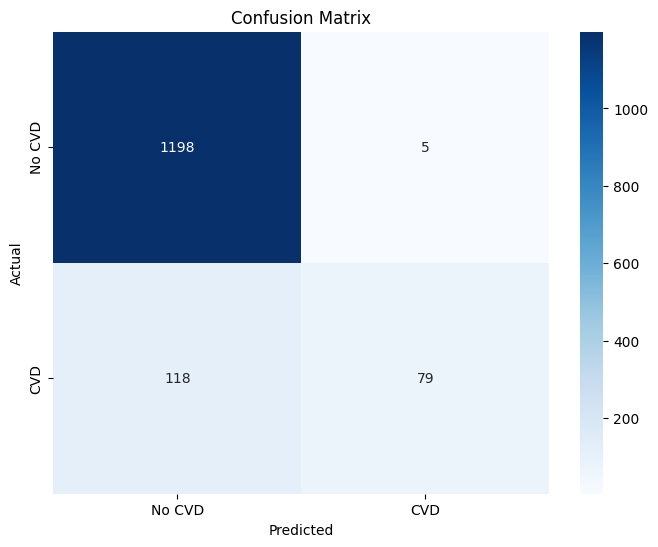

In [35]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No CVD', 'CVD'], yticklabels=['No CVD', 'CVD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()